In [20]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

fuel_econ=pd.read_csv('./fuel-econ.csv')
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


In [21]:
sedan_classes=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass']=fuel_econ['VClass'].astype(vclasses)

fuel_econ['trans_type']=fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


> Encoding via Shape


In [22]:
np.random.seed(2018)
sample=np.random.choice(fuel_econ.shape[0],200,replace=True)
sample
fuel_econ_subset=fuel_econ.loc[sample]
fuel_econ_subset

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
1274,34649,Kia,K900,2015,Large Cars,Rear-Wheel Drive,Automatic 8-spd,Regular Gasoline,6,3.8,...,110,17.7469,22.200,26.2583,37.1000,20.7776,428,5,5,Automatic
2662,37387,Lincoln,MKZ FWD,2017,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.0,...,99,20.9627,26.600,31.1035,44.7000,24.0000,370,5,5,Automatic
2274,36581,Chrysler,200,2016,Midsize Cars,Front-Wheel Drive,Automatic 9-spd,Regular Gasoline,4,2.4,...,101,22.9620,29.400,36.0000,52.1952,27.3605,326,7,7,Automatic
2825,37743,Audi,A5 quattro,2017,Subcompact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,...,0,22.6211,28.200,32.2244,44.4000,26.1246,338,6,6,Manual
917,34008,MINI,Cooper S Countryman,2014,Compact Cars,Front-Wheel Drive,Manual 6-spd,Premium Gasoline,4,1.6,...,0,26.1013,33.900,31.6040,45.5000,28.3202,313,7,7,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,35087,Audi,S5,2015,Subcompact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,6,3.0,...,0,17.0438,20.000,26.0230,33.4000,20.1767,439,5,5,Manual
3754,39423,BMW,328d xDrive,2018,Compact Cars,All-Wheel Drive,Automatic (S8),Diesel,4,2.0,...,96,29.7510,39.297,39.9232,59.2256,33.6039,303,8,6,Automatic
1183,34469,Lexus,IS F,2014,Subcompact Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,8,5.0,...,88,15.8028,19.600,22.9789,32.1000,18.3867,475,4,4,Automatic
1812,35626,Chevrolet,Cruze Eco,2015,Midsize Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.4,...,94,27.8749,36.500,40.4951,60.2000,32.4218,272,8,8,Manual


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

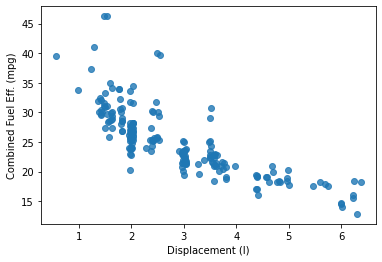

In [23]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb',
          x_jitter=0.04, fit_reg=False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

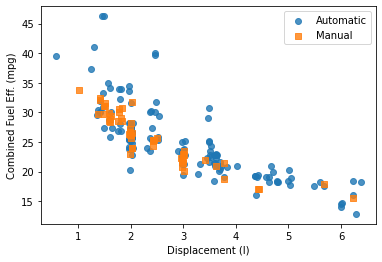

In [32]:
'''cat_markers = [['A', 'o'],
               ['B', 's']]

for cat, marker in cat_markers:
    df_cat = df[df['cat_var1'] == cat]
    plt.scatter(data = df_cat, x = 'num_var1', y = 'num_var2', marker = marker)
plt.legend(['A','B'])
'''


ttype_markers=[['Automatic', 'o'],
               ['Manual', 's']]

for ttype, markers in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type']==ttype]
    sb.regplot(data=plot_data, x='displ', y='comb', marker=markers,
               fit_reg=False, x_jitter=0.04)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic','Manual']);

> Encoding via Size


Text(0.5, 1.0, 'Using Reg Plot')

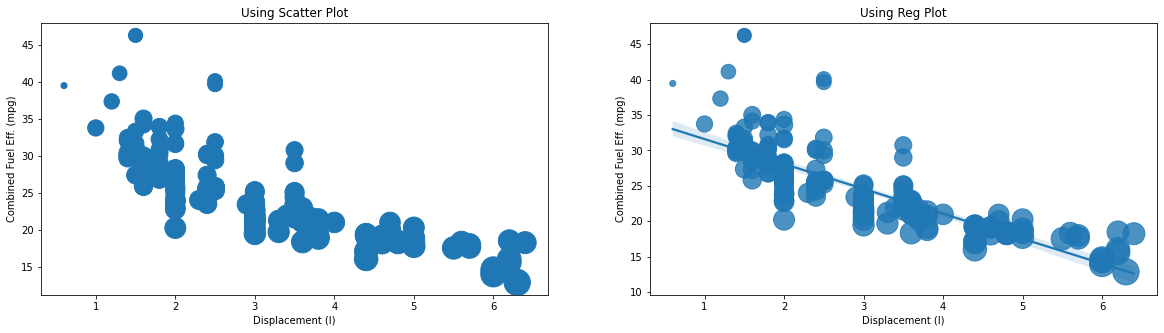

In [47]:
'''
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', s = 'num_var3')

# dummy series for adding legend
sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
'''
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', s = 'co2')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.title("Using Scatter Plot")

plt.subplot(1,2,2)
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', 
           scatter_kws = {'s': fuel_econ_subset.co2})
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.title("Using Reg Plot")


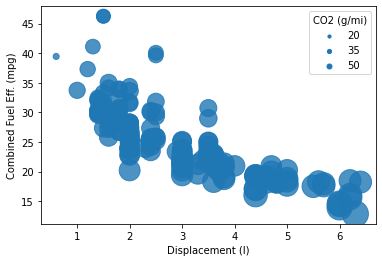

In [48]:
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', 
           scatter_kws = {'s': fuel_econ_subset.co2}, fit_reg=False)

sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/2, color = base_color))
plt.legend(legend_obj, sizes, title='CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

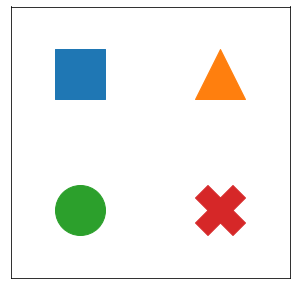

In [50]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([]);